In [1]:
import numpy as np
import matplotlib.pyplot as plt
import my_hmf_cmf_lib as mycmf

plt.style.use('stylesheet.mplstyle')

In [2]:
# Constants
tau_SF = 100e9 # yr
tau_SF_SI = tau_SF * 365.25 * 24 * 60 * 60 # s

# Example parameters
H0 = 70 # Hubble parameter km/s/Mpc
Mega = 1e6
parsec = 3.085677581e16

sizeSI = 1 * Mega * parsec

In [3]:
def compute_fcoll2(x0,x1,x2):
    """
    x0 is the redshift
    x1 is the cell half width in Mpc/h
    x2 is the non-linear overdensity
    """
    res = np.tanh((x1*np.exp(-0.68206894**x2*(x0 + np.exp(x1)/x1)))**0.31093377)
    return res

In [4]:
# Grid of values
redshift = np.linspace(0, 16, 100)
dnl = np.linspace(-1, 3, 100)

# Meshgrid for evaluating over both
Z, DNL = np.meshgrid(redshift, dnl)

num1 = Z + 1.7733107
denom1 = DNL + 1.2541921
num2 = 0.43024173
denom2 = np.cosh(Z)
power_in_tanh = num1 / denom1 + num2 / denom2
fcoll1 = np.tanh(0.6092303 ** power_in_tanh)

cell_half_width_m = sizeSI / 2.0
cell_half_width_mpc_h = cell_half_width_m / (Mega * parsec) * (H0 / 100)
# term = (cell_half_width_mpc_h * np.exp(DNL) / (Z - 1 * 2.6128263) - 0.034771573) * np.exp(DNL)
# fcoll2 = np.tanh(term) / Z
fcoll2 = compute_fcoll2(Z, cell_half_width_mpc_h, DNL)

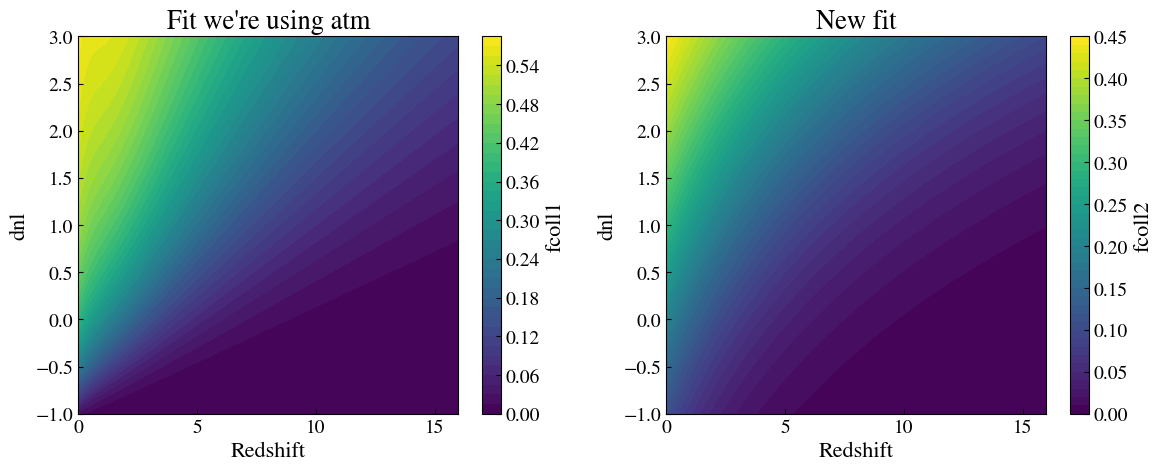

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.contourf(Z, DNL, fcoll1, levels=50, cmap='viridis')
plt.colorbar(label='fcoll1')
plt.title("Fit we're using atm")
plt.xlabel('Redshift')
plt.ylabel('dnl')

plt.subplot(1,2,2)
plt.contourf(Z, DNL, fcoll2, levels=50, cmap='viridis')
plt.colorbar(label='fcoll2')
plt.title('New fit')
plt.xlabel('Redshift')
plt.ylabel('dnl')

plt.tight_layout()
plt.show()

In [6]:
np.min(fcoll2)

7.723707048988749e-05

In [7]:
h = H0 / 100.0

def compute_Mreg(dnl, R):
    Vreg = (R*h)**3 * 4.0/3.0 * np.pi #(Mpc/h)^3
    Mreg = mycmf.rho_0_h2_Msun_Mpc3 * (1 + dnl) * Vreg #Msun/h
    return Mreg

In [8]:
delta_L = mycmf.compute_delta_linear(dnl)

h = mycmf.h
Vreg = (sizeSI*h)**3 * 4.0/3.0 * np.pi #(Mpc/h)^3

/home/mesquita/stage/my_hmf_cmf_lib.py:621: RuntimeWarning: divide by zero encountered in divide
  res = delta_c / 1.68647  * (1.68647 - 1.35/(1+delta_NL)**(2/3) - 1.12431/(1+delta_NL)**(1/2) + 0.78785/(1+delta_NL)**0.58661)
/home/mesquita/stage/my_hmf_cmf_lib.py:621: RuntimeWarning: invalid value encountered in add
  res = delta_c / 1.68647  * (1.68647 - 1.35/(1+delta_NL)**(2/3) - 1.12431/(1+delta_NL)**(1/2) + 0.78785/(1+delta_NL)**0.58661)


In [9]:
# fcoll_val = mycmf.fcoll(Mmin, Mreg, kh, pk, R_list[j]*h, dl, dnl, 'QcST')

In [10]:
mycmf.compute_delta_linear(-1+0.0001)

-562.4212713701613

In [11]:
dl = mycmf.compute_delta_linear(dnl)

Text(0, 0.5, 'dnl')

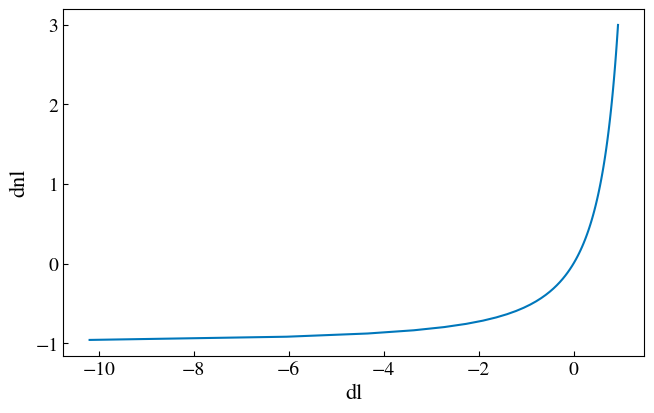

In [12]:
plt.plot(dl,dnl)
plt.xlabel('dl')
plt.ylabel('dnl')